In [2]:
import torch
import torchvision
from torchvision import datasets
from torch.utils.data import DataLoader, random_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random
from torchvision import transforms
import os
from torch import nn, optim
from torch.nn import functional as F
from tqdm.auto import tqdm
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
from rembg import remove


dataset_dir = "asl_dataset_new"
len_img = 128

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
transform = transforms.Compose([
    transforms.Resize((len_img, len_img)), 
    transforms.ToTensor(),  
])

In [4]:
transform_with_augment = transforms.Compose([
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transform,
])


In [5]:
dataset = datasets.ImageFolder(root=dataset_dir, transform=transform_with_augment)
dataset

Dataset ImageFolder
    Number of datapoints: 25150
    Root location: asl_dataset_new
    StandardTransform
Transform: Compose(
               TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
               Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
           )

In [6]:
len(dataset.classes)

36

In [7]:
label_to_num = dataset.class_to_idx
num_to_label = {}
for key, value in label_to_num.items():
    num_to_label[value] = key

label_to_num

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'a': 10,
 'b': 11,
 'c': 12,
 'd': 13,
 'e': 14,
 'f': 15,
 'g': 16,
 'h': 17,
 'i': 18,
 'j': 19,
 'k': 20,
 'l': 21,
 'm': 22,
 'n': 23,
 'o': 24,
 'p': 25,
 'q': 26,
 'r': 27,
 's': 28,
 't': 29,
 'u': 30,
 'v': 31,
 'w': 32,
 'x': 33,
 'y': 34,
 'z': 35}

In [196]:
img, label = dataset[200]
img.permute(1, 2, 0), label, img.shape

(tensor([[[1.0000, 0.9647, 0.9059],
          [0.8745, 0.8392, 0.7804],
          [0.8784, 0.8235, 0.7725],
          ...,
          [0.4863, 0.4078, 0.3725],
          [0.6078, 0.5333, 0.5059],
          [0.7059, 0.6392, 0.6078]],
 
         [[1.0000, 0.9647, 0.9059],
          [0.8745, 0.8392, 0.7804],
          [0.8745, 0.8196, 0.7686],
          ...,
          [0.4588, 0.3804, 0.3451],
          [0.6157, 0.5412, 0.5137],
          [0.6980, 0.6314, 0.6000]],
 
         [[0.9961, 0.9608, 0.9020],
          [0.8745, 0.8392, 0.7804],
          [0.8784, 0.8235, 0.7725],
          ...,
          [0.4824, 0.4039, 0.3686],
          [0.6235, 0.5490, 0.5216],
          [0.6941, 0.6275, 0.5961]],
 
         ...,
 
         [[0.6784, 0.7412, 0.8039],
          [0.6471, 0.7216, 0.7804],
          [0.6588, 0.7255, 0.7961],
          ...,
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000]],
 
         [[0.6627, 0.7294, 0.8000],
          [0

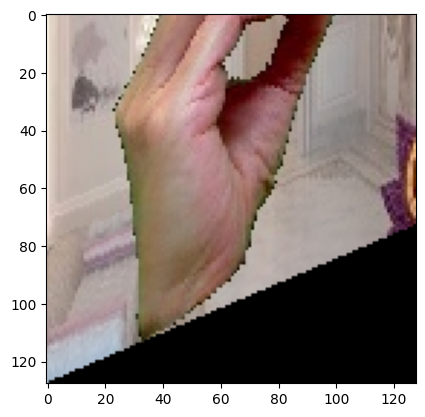

In [197]:
plt.imshow(img.permute(1, 2, 0))

In [198]:
type(dataset)

torchvision.datasets.folder.ImageFolder

In [199]:
train_size = int(0.8 * (len(dataset)))
test_size = int(len(dataset) - train_size)
train_size, test_size

(20120, 5030)

In [200]:
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
len(train_dataset), len(test_dataset)

(20120, 5030)

In [201]:
train_dataset[0]

(tensor([[[0.6706, 0.6784, 0.6902,  ..., 0.3882, 0.4078, 0.4078],
          [0.6902, 0.6902, 0.6902,  ..., 0.3882, 0.4157, 0.4157],
          [0.7020, 0.6902, 0.6902,  ..., 0.4000, 0.4235, 0.4157],
          ...,
          [0.0078, 0.0039, 0.0078,  ..., 0.2000, 0.1843, 0.1961],
          [0.0000, 0.0000, 0.0000,  ..., 0.3059, 0.2784, 0.2667],
          [0.0000, 0.0000, 0.0000,  ..., 0.3647, 0.3451, 0.3569]],
 
         [[0.7176, 0.7255, 0.7373,  ..., 0.4745, 0.4863, 0.4863],
          [0.7373, 0.7373, 0.7373,  ..., 0.4745, 0.4941, 0.4941],
          [0.7451, 0.7373, 0.7373,  ..., 0.4784, 0.5137, 0.5059],
          ...,
          [0.0314, 0.0314, 0.0353,  ..., 0.2314, 0.2196, 0.2392],
          [0.0275, 0.0275, 0.0275,  ..., 0.3882, 0.3451, 0.3255],
          [0.0275, 0.0275, 0.0275,  ..., 0.4431, 0.4275, 0.4353]],
 
         [[0.7059, 0.7098, 0.7176,  ..., 0.3882, 0.4196, 0.4196],
          [0.7176, 0.7176, 0.7176,  ..., 0.3882, 0.4235, 0.4235],
          [0.7294, 0.7176, 0.7176,  ...,

In [202]:
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)
len(train_dataloader), len(test_dataloader)

(1258, 315)

In [203]:
dataloader_1 = next(iter(train_dataloader))

torch.Size([3, 128, 128])


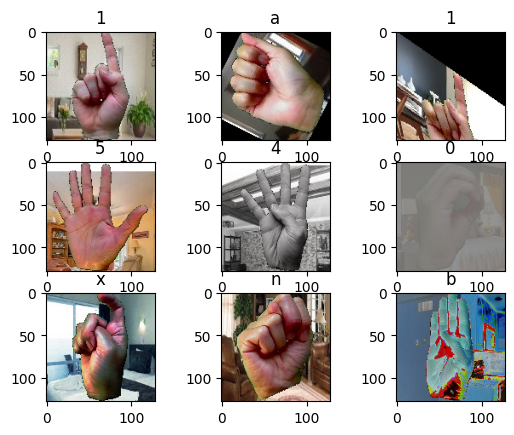

In [204]:
images, labels = dataloader_1[0], dataloader_1[1]
print(images[0].shape)
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i].permute(1, 2, 0))
    plt.title(num_to_label[labels[i].item()])

In [205]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape, output_shape, hidden_units):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 29 * 29,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [206]:
model = TinyVGG(input_shape=3, output_shape=len(dataset.classes), hidden_units=16)
model

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=13456, out_features=36, bias=True)
  )
)

In [207]:
model(img.unsqueeze(0))

tensor([[-0.0432, -0.0079,  0.0162, -0.0211, -0.0685, -0.0605,  0.0582,  0.0580,
          0.0061, -0.0264, -0.0092, -0.0333, -0.0456, -0.0177,  0.0398,  0.0208,
          0.0481, -0.0392,  0.0037,  0.0276, -0.0124,  0.0552, -0.0168,  0.0712,
          0.0335, -0.0037,  0.0108,  0.0549,  0.0370, -0.0283, -0.0529,  0.0018,
          0.0947, -0.0104, -0.0211, -0.0051]], grad_fn=<AddmmBackward0>)

In [208]:
def accuracy(y_labels, y):
    return (y_labels==y).sum().item()/len(y_labels)

In [209]:
def train_step(model, dataloader, loss_fn, optimizer):
    model.train()

    train_loss, train_acc = 0, 0
    for batch, (X, y) in tqdm(enumerate(dataloader)):
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        y_prob = torch.softmax(y_pred, dim=1)
        y_labels = torch.argmax(y_prob, dim=1)
        acc = accuracy(y_labels, y)
        train_acc += acc
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc
        
        
        

In [210]:
def test_step(model, dataloader, loss_fn):
    model.eval()
    with torch.inference_mode():
        test_loss, test_acc = 0, 0
        for batch, (X, y) in tqdm(enumerate(dataloader)):
            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            test_loss += loss
            y_prob = torch.softmax(y_pred, dim=1)
            y_labels = torch.argmax(y_prob, dim=1)
            acc = accuracy(y_labels, y)
            test_acc += acc

        test_loss = test_loss / len(dataloader)
        test_acc = test_acc / len(dataloader)

    return test_loss, test_acc

In [211]:
def train(num_epochs, model, train_dataloader, test_dataloader, loss_fn, optimizer):
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
              }
    for i in range(num_epochs):
        train_loss, train_acc = train_step(model, train_dataloader, loss_fn, optimizer)
        test_loss, test_acc = test_step(model, test_dataloader, loss_fn)
        print(f"Epoch: {i} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc:.3f} | Test Loss: {test_loss:.3f} | Test Acc: {test_acc:.3f}")
        results["train_loss"].append(train_loss.item())
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss.item())
        results["test_acc"].append(test_acc)

    return results

In [212]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [213]:
results = train(10, model, train_dataloader, test_dataloader, loss_fn, optimizer)

1258it [04:25,  4.73it/s]
315it [00:28, 11.00it/s]


Epoch: 0 | Train Loss: 3.585 | Train Acc: 0.026 | Test Loss: 3.584 | Test Acc: 0.025


1258it [03:28,  6.05it/s]
315it [00:28, 10.98it/s]


Epoch: 1 | Train Loss: 3.584 | Train Acc: 0.027 | Test Loss: 3.584 | Test Acc: 0.025


1258it [03:27,  6.07it/s]
315it [00:28, 10.88it/s]


Epoch: 2 | Train Loss: 2.204 | Train Acc: 0.440 | Test Loss: 1.178 | Test Acc: 0.716


1258it [04:19,  4.84it/s]
315it [00:36,  8.63it/s]


Epoch: 3 | Train Loss: 1.058 | Train Acc: 0.739 | Test Loss: 0.900 | Test Acc: 0.776


1258it [04:13,  4.97it/s]
315it [00:33,  9.53it/s]


Epoch: 4 | Train Loss: 0.864 | Train Acc: 0.782 | Test Loss: 0.836 | Test Acc: 0.783


1258it [12:36,  1.66it/s]
315it [00:39,  8.07it/s]


Epoch: 5 | Train Loss: 0.751 | Train Acc: 0.803 | Test Loss: 0.710 | Test Acc: 0.811


1258it [04:13,  4.97it/s]
315it [00:33,  9.32it/s]


Epoch: 6 | Train Loss: 0.655 | Train Acc: 0.825 | Test Loss: 0.620 | Test Acc: 0.836


1258it [04:08,  5.07it/s]
315it [00:34,  9.02it/s]


Epoch: 7 | Train Loss: 0.607 | Train Acc: 0.839 | Test Loss: 0.553 | Test Acc: 0.854


1258it [04:08,  5.06it/s]
315it [00:34,  9.05it/s]


Epoch: 8 | Train Loss: 0.562 | Train Acc: 0.849 | Test Loss: 0.612 | Test Acc: 0.833


1258it [04:07,  5.08it/s]
315it [00:34,  9.19it/s]


Epoch: 9 | Train Loss: 0.523 | Train Acc: 0.858 | Test Loss: 0.491 | Test Acc: 0.864


In [214]:
results

{'train_loss': [3.5850350856781006,
  3.5839805603027344,
  2.204085350036621,
  1.0582093000411987,
  0.8643314838409424,
  0.7514833211898804,
  0.6546443104743958,
  0.6071734428405762,
  0.5619400143623352,
  0.5234394669532776],
 'train_acc': [0.026232114467408585,
  0.02707670906200318,
  0.440431240063593,
  0.7390699523052464,
  0.78189586645469,
  0.802762321144674,
  0.8249701907790143,
  0.8392786168521462,
  0.8491156597774245,
  0.8577106518282989],
 'test_loss': [3.584141731262207,
  3.5844390392303467,
  1.1783883571624756,
  0.9000487327575684,
  0.8361244797706604,
  0.7095988988876343,
  0.620253324508667,
  0.5528433918952942,
  0.6117510199546814,
  0.490500271320343],
 'test_acc': [0.025,
  0.025,
  0.7157407407407408,
  0.7756613756613757,
  0.7828042328042328,
  0.8114417989417989,
  0.8359788359788359,
  0.8540343915343914,
  0.8328042328042328,
  0.8641534391534391]}

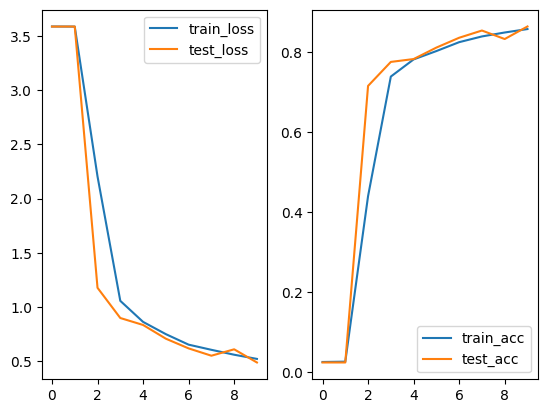

In [215]:
plt.subplot(1, 2, 1)
plt.plot(results["train_loss"], label="train_loss")
plt.plot(results["test_loss"], label="test_loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(results["train_acc"], label="train_acc")
plt.plot(results["test_acc"], label="test_acc")
plt.legend()

In [216]:
y_preds = []
y_og = []
model.eval()
with torch.inference_mode():
    for X, y in test_dataloader:
        y_pred = model(X)
        y_prob = torch.softmax(y_pred, dim=1)
        y_labels = torch.argmax(y_prob, dim=1)
        y_preds.append(y_labels)
        y_og.append(y)

y_pred_tensor = torch.cat(y_preds)
y_og_tensor = torch.cat(y_og)    

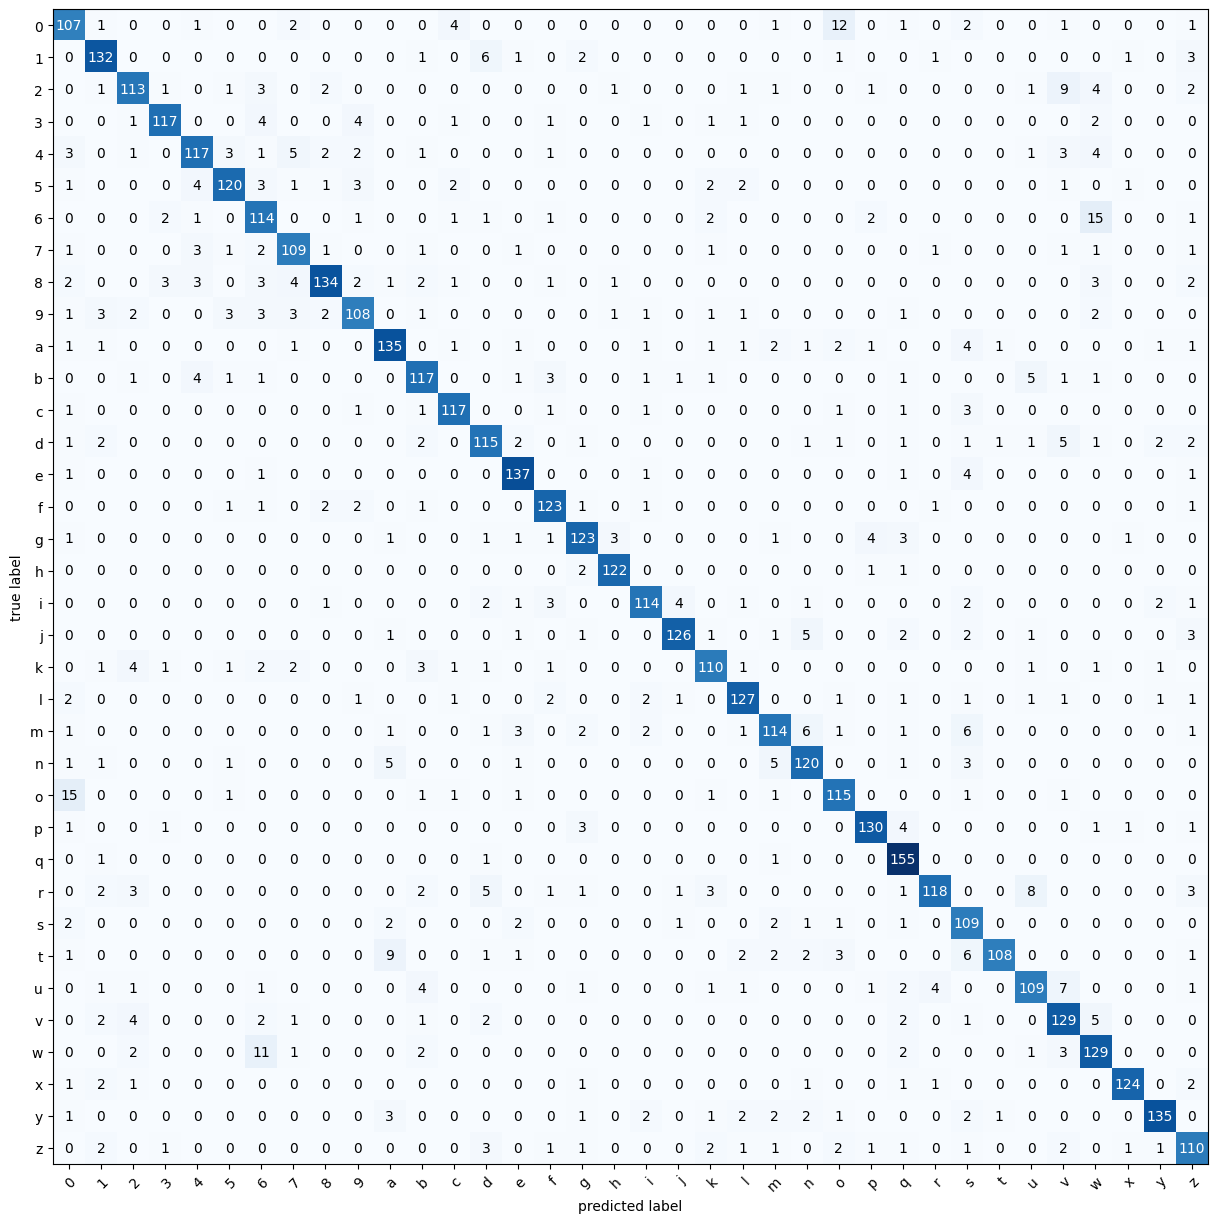

In [231]:
confmat = ConfusionMatrix(num_classes = len(dataset.classes), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor, target=y_og_tensor)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=dataset.classes,
    figsize=(15, 15)
)

In [232]:
torch.save(model.state_dict(), "model_new.pth")

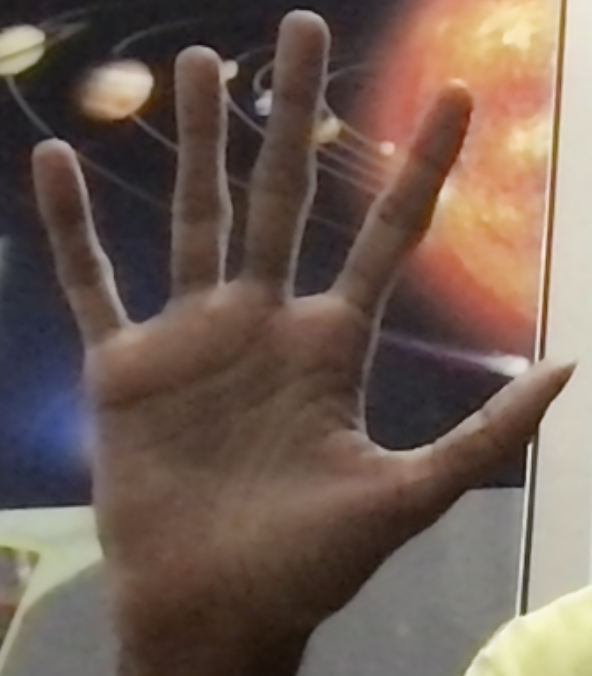

In [233]:
img1 = Image.open("images/hand_5.png")
img1

Context leak detected, CoreAnalytics returned false
Context leak detected, CoreAnalytics returned false


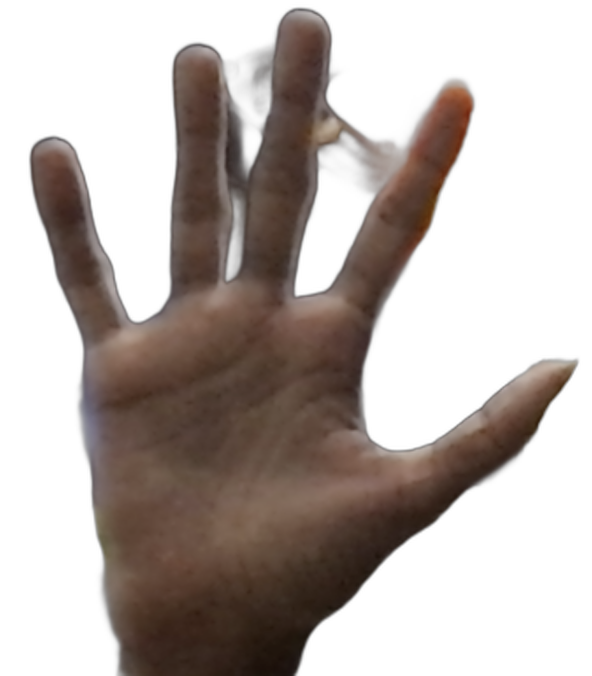

In [234]:
img1_no_bg = remove(img1)
img1_no_bg

In [235]:
img1_np = np.array(img1_no_bg)
img1_np

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

(676, 592, 3)

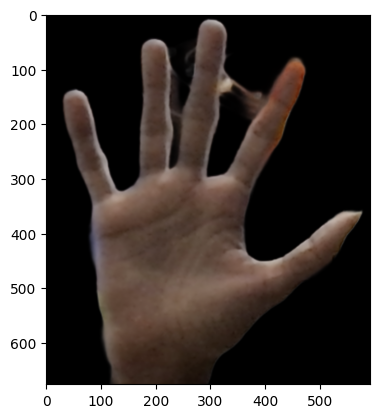

In [236]:
img1_np[np.all(img1_np == [0, 0, 0, 0], axis=-1)] = [0, 0, 0, 255]
img1_np = img1_np[:, :, :3]
plt.imshow(img1_np)
img1_np.shape

In [246]:
img1_tensor = transform(Image.fromarray(img1_np))
img1_tensor.shape

torch.Size([3, 128, 128])

In [247]:
model1 = TinyVGG(input_shape=3, output_shape=36, hidden_units=16)

In [248]:
model1.load_state_dict(torch.load("model_new.pth"))

<All keys matched successfully>

In [240]:
model1.eval()

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=13456, out_features=36, bias=True)
  )
)

In [241]:
pred = model1(img1_tensor.unsqueeze(0))
pred

tensor([[ -8.2487,  -7.4268,  -6.5487,  -4.2229,  -4.2893,  -4.1686,  -4.7182,
          -5.4177,  -7.4103,  -4.7882,  -9.2752,  -4.1153,  -7.6064,  -7.3093,
         -10.7798,  -5.5473, -11.8140, -10.5556, -10.0796,  -8.2997,  -7.2326,
          -7.0040,  -9.4783,  -9.4867,  -7.7344, -12.8060, -11.6170,  -7.5675,
          -8.9737,  -7.1329,  -6.7981,  -5.3346,  -3.9940,  -9.4112,  -7.8992,
         -10.0250]], grad_fn=<AddmmBackward0>)

In [242]:
prob = torch.softmax(pred, dim=1)
prob

tensor([[2.2023e-03, 5.0096e-03, 1.2054e-02, 1.2337e-01, 1.1545e-01, 1.3026e-01,
         7.5182e-02, 3.7354e-02, 5.0928e-03, 7.0100e-02, 7.8892e-04, 1.3739e-01,
         4.1862e-03, 5.6342e-03, 1.7523e-04, 3.2814e-02, 6.2300e-05, 2.1927e-04,
         3.5293e-04, 2.0927e-03, 6.0832e-03, 7.6461e-03, 6.4394e-04, 6.3855e-04,
         3.6833e-03, 2.3102e-05, 7.5863e-05, 4.3520e-03, 1.0666e-03, 6.7212e-03,
         9.3934e-03, 4.0590e-02, 1.5511e-01, 6.8861e-04, 3.1237e-03, 3.7275e-04]],
       grad_fn=<SoftmaxBackward0>)

In [243]:
label = torch.argmax(prob, dim=1).item()
label, num_to_label[label], prob.max().item()

(32, 'w', 0.1551087498664856)

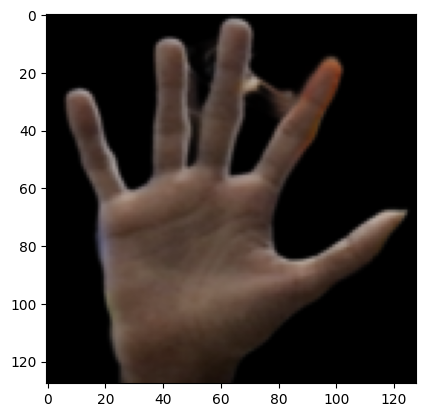

In [244]:
augmented_img = transform_with_augment(Image.fromarray(img1_np))
plt.imshow(augmented_img.permute(1, 2, 0).numpy())